In [1]:
# Installing necessary Libraries that are essential,
# !pip install pandas,
# !pip install numpy,
# !pip install matplotlib,
# !pip install searborn,
# !pip install scikit-learn,
# !pip install warnings,
# !pip install statsmodels
# !pip install autoviz,

# Importing necessary Libraries that are essential for the EDA and Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_text
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [2]:
# Loading the KickstarteData_Facts Records dataset and displaying first few records of it
df = pd.read_csv('KickstarterData_Facts-1.csv')
df.head()

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,01-07-19,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,01-07-19,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,01-07-19,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,01-07-19,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,01-07-19,male,100,white,1,vanilla,yes,<50K,yes,7,0


In [3]:
# Column level datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Donate ID                               10000 non-null int64
Donate Date                             10000 non-null object
Gender                                  10000 non-null object
Deposit Amount                          10000 non-null int64
Preferred Color of Device               10000 non-null object
Ice Cream Products Consumed Per Week    10000 non-null int64
Favorite Flavor Of Ice Cream            10000 non-null object
Donated To Kick Starter Before          10000 non-null object
Household Income                        10000 non-null object
Do you own a Keurig                     10000 non-null object
How many desserts do you eat a week     10000 non-null int64
Purchased                               10000 non-null int64
dtypes: int64(5), object(7)
memory usage: 937.6+ KB


In [4]:
# Dropping Donate ID Column
df.drop('Donate ID', axis = 1, inplace = True)

In [5]:
# Displaying first few records of the dataframe
df.head()

,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,01-07-19,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,01-07-19,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,01-07-19,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,01-07-19,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,01-07-19,male,100,white,1,vanilla,yes,<50K,yes,7,0


In [6]:
# Checking null values in the columns
df.isnull().sum()

Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

In [7]:
# Total number of records
n_records = df.shape[0]

In [8]:
# Individuals making less than $50,000
n_lesser_50k = df[df['Household Income'] == '<50K'].shape[0]

In [9]:
# Individuals making less than $100,000
n_lesser_100k = df[df['Household Income'] == '<100K'].shape[0]

In [10]:
# Individuals making more than $100,000
n_greater_100k = df[df['Household Income'] == '>100K'].shape[0]

In [11]:
# Individuals not reported anything
n_not_reported = df[df['Household Income'] == 'Not Reported'].shape[0]

In [12]:
print("Total number of records: {}".format(n_records))
print("Individuals making less than $50,000: {}".format(n_lesser_50k))
print("Individuals making less than $100,000: {}".format(n_lesser_100k))
print("Individuals making more than $100,000: {}".format(n_greater_100k))
print("Individuals not reported anything: {}".format(n_not_reported))

Total number of records: 10000
Individuals making less than $50,000: 728
Individuals making less than $100,000: 2806
Individuals making more than $100,000: 1665
Individuals not reported anything: 4801


In [13]:
# Displaying first few records of the dataframe
df.head()

,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,01-07-19,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,01-07-19,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,01-07-19,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,01-07-19,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,01-07-19,male,100,white,1,vanilla,yes,<50K,yes,7,0


In [14]:
# Hardcode encoding the categorical values to integers
df = df.replace(["male","female"],[0,1])
df = df.replace(["yes", "no"], [1,0])
df = df.replace(["white","blue",'silver','black','blue','red','no preference'],[0,1,2,3,4,5,6])
df = df.replace(['vanilla', 'swirl', 'no preference', 'chocolate', 'specialty'],[0,1,2,3,4])
df = df.replace(['<50K', '<100K', '>100K', 'Not Reported'],[0,1,2,3])

In [15]:
# Displaying first few records of the dataframe
df.head()

,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,01-07-19,1,100,0,4,0,1,0,1,7,0
1,01-07-19,1,100,4,5,0,1,0,1,5,1
2,01-07-19,1,100,2,6,0,1,0,1,6,1
3,01-07-19,1,100,2,5,0,1,0,1,5,1
4,01-07-19,0,100,0,1,0,1,0,1,7,0


In [16]:
# Mean of the Ice Cream Products Consumed Per Week
meanOfIceCreamProds = round(df['Ice Cream Products Consumed Per Week'].mean(), 2)
meanOfIceCreamProds

4.96

In [17]:
df['Ice Cream Products Consumed Per Week'].fillna(meanOfIceCreamProds, inplace = True)

In [18]:
df['Ice Cream Products Consumed Per Week'].isnull().sum()

0

In [19]:
modeOfDepositAmount = df['Deposit Amount'].mode()[0]
modeOfDepositAmount

100

In [20]:
df['Deposit Amount'].fillna(modeOfDepositAmount, inplace = True)
df['Deposit Amount'].isnull().sum()

0

In [21]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,100,0,4,0,1,0,1,7,0
1,1,100,4,5,0,1,0,1,5,1
2,1,100,2,6,0,1,0,1,6,1
3,1,100,2,5,0,1,0,1,5,1
4,0,100,0,1,0,1,0,1,7,0


In [22]:
# All Numeric Columns Histogram Plots
df_num.hist(figsize=(20, 20), bins=100, xlabelsize=12, ylabelsize=12)

array([[<AxesSubplot:title={'center':'Deposit Amount'}>,
        <AxesSubplot:title={'center':'Do you own a Keurig'}>,
        <AxesSubplot:title={'center':'Donated To Kick Starter Before'}>],
       [<AxesSubplot:title={'center':'Favorite Flavor Of Ice Cream'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Household Income'}>],
       [<AxesSubplot:title={'center':'How many desserts do you eat a week'}>,
        <AxesSubplot:title={'center':'Ice Cream Products Consumed Per Week'}>,
        <AxesSubplot:title={'center':'Preferred Color of Device'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [23]:
# Basic Statistical Description of all the Numeric Columns
df.describe()

,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.472600,139.515800,3.338300,4.962300,2.787100,0.675600,2.053900,0.813600,6.686800,0.651300
std,0.499274,80.483091,1.968106,3.165293,2.146121,0.468174,1.024256,0.389449,2.460592,0.476583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,5.000000,0.000000
50%,0.000000,100.000000,4.000000,5.000000,3.000000,1.000000,2.000000,1.000000,7.000000,1.000000
75%,1.000000,119.000000,5.000000,8.000000,4.000000,1.000000,3.000000,1.000000,9.000000,1.000000
max,1.000000,400.000000,6.000000,10.000000,6.000000,1.000000,3.000000,1.000000,10.000000,1.000000


In [24]:
# Scatter Plot
df.plot.scatter(x="Ice Cream Products Consumed Per Week",y="How many desserts do you eat a week")
plt.show()

In [25]:
# Scatter Plot
df.plot.scatter(x="Ice Cream Products Consumed Per Week",y="Deposit Amount")
plt.show()

In [26]:
# Scatter Plot
df.plot.scatter(x="How many desserts do you eat a week",y="Deposit Amount")
plt.show()

In [27]:
# Searborn's Pair Plot
sns.pairplot(data = df, vars=['Deposit Amount','Ice Cream Products Consumed Per Week','How many desserts do you eat a week'])
plt.show()

In [28]:
# Heat Map
df[['Deposit Amount','Ice Cream Products Consumed Per Week','How many desserts do you eat a week']].corr()
sns.heatmap(df[['Deposit Amount','Ice Cream Products Consumed Per Week','How many desserts do you eat a week']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [29]:
df.groupby('Donated To Kick Starter Before')['Deposit Amount'].mean()

Donated To Kick Starter Before
0    111.369914
1    153.030491
Name: Deposit Amount, dtype: float64

In [30]:
df.groupby('Donated To Kick Starter Before')['Deposit Amount'].median()

Donated To Kick Starter Before
0    100
1    100
Name: Deposit Amount, dtype: int64

In [31]:
# Box Plot
sns.boxplot(df['Donated To Kick Starter Before'], df['Deposit Amount'])
plt.show()

In [32]:
df.groupby('Do you own a Keurig')['Deposit Amount'].mean()

Do you own a Keurig
0    137.205472
1    140.045108
Name: Deposit Amount, dtype: float64

In [33]:
df.groupby('Do you own a Keurig')['Deposit Amount'].median()

Do you own a Keurig
0    100
1    100
Name: Deposit Amount, dtype: int64

In [34]:
# Box Plot
sns.boxplot(df['Do you own a Keurig'], df['Deposit Amount'])
plt.show()

In [35]:
# Bar Plot
df.groupby('Gender')['Donated To Kick Starter Before'].mean().plot.bar()
plt.show()

In [36]:
# Bar Plot
df.groupby('Gender')['Do you own a Keurig'].mean().plot.bar()
plt.show()

In [37]:
# Heat Map
result = pd.pivot_table(data=df, index='Gender', columns='Preferred Color of Device',values='Donated To Kick Starter Before')
print(result)

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

Preferred Color of Device         0         2         3         4         5  \
Gender                                                                        
0                          0.703704  0.672185  0.679860  0.698782  0.682243   
1                          0.675033  0.681250  0.646277  0.682741  0.647482   

Preferred Color of Device         6  
Gender                               
0                          0.681024  
1                          0.649057  


In [38]:
# Heat Map
result = pd.pivot_table(data=df, index='Gender', columns='Preferred Color of Device',values='Do you own a Keurig')
print(result)

sns.heatmap(result, annot=True, cmap = 'Blues', center=0.117)
plt.show()

Preferred Color of Device         0         2        3         4         5  \
Gender                                                                       
0                          0.838384  0.833333  0.83702  0.810631  0.793224   
1                          0.813738  0.788750  0.81250  0.815990  0.805755   

Preferred Color of Device         6  
Gender                               
0                          0.811409  
1                          0.797484  


In [39]:
# Auto Visualization Class
AV = AutoViz_Class()

Shape of your Data Set: (10000, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


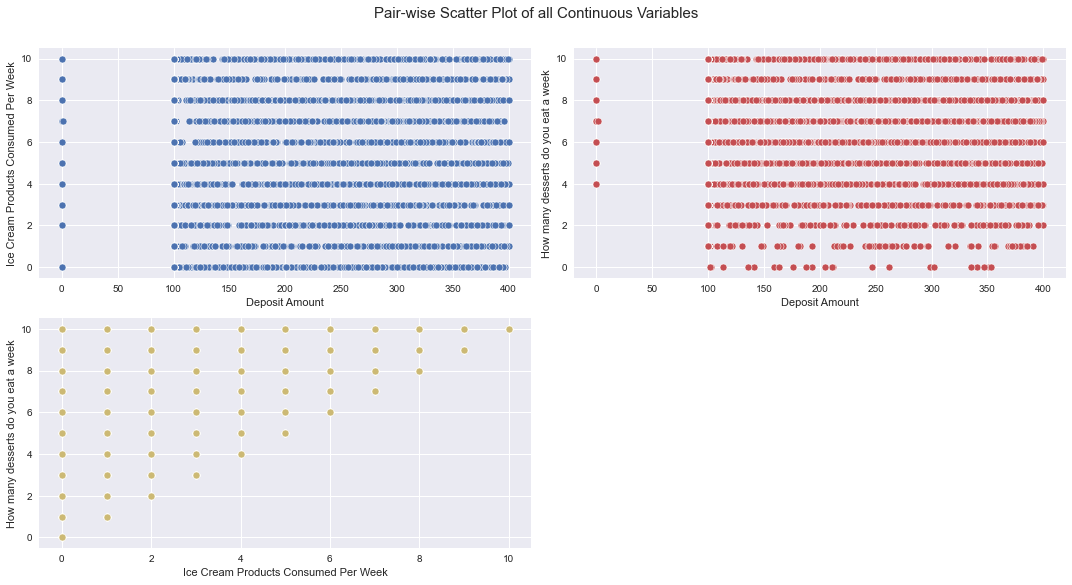

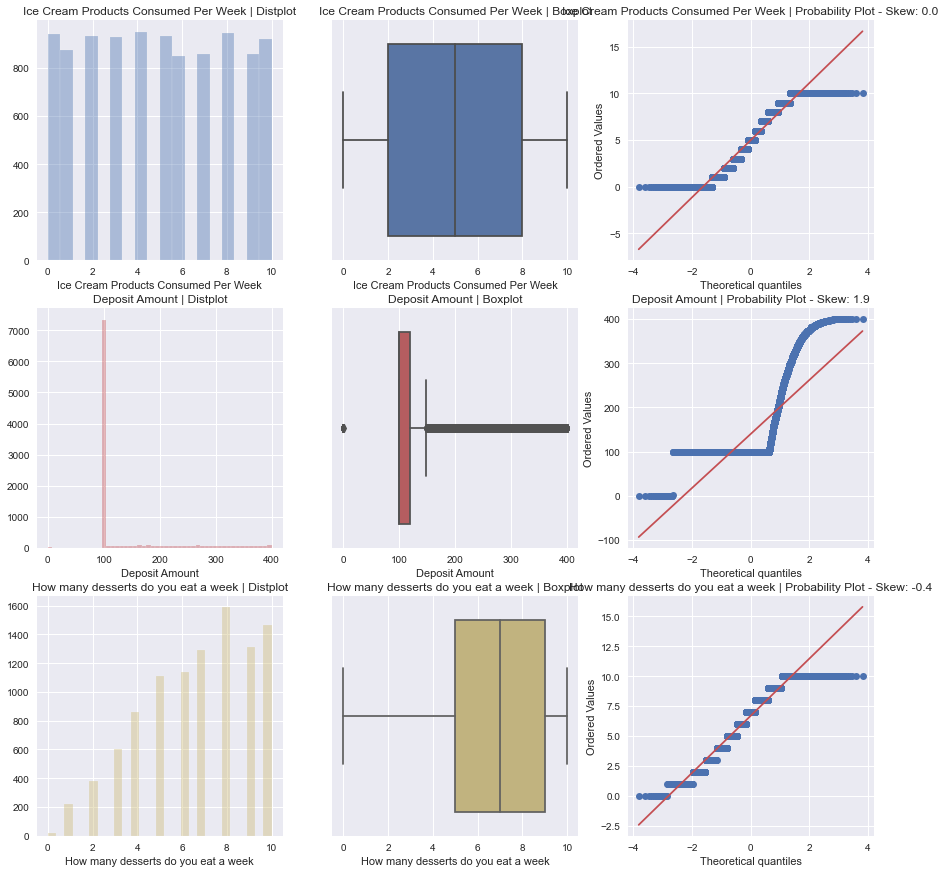

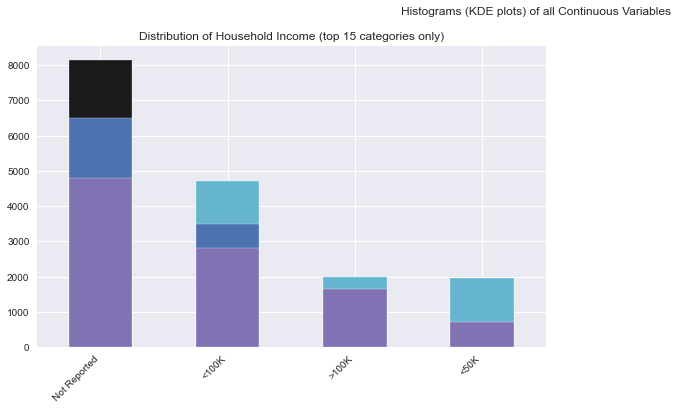

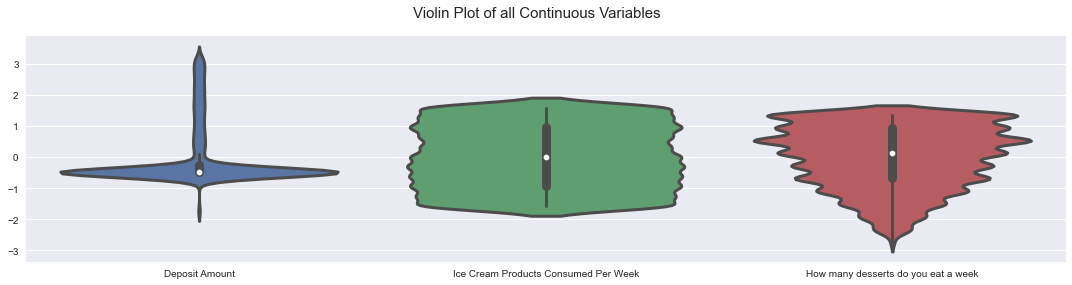

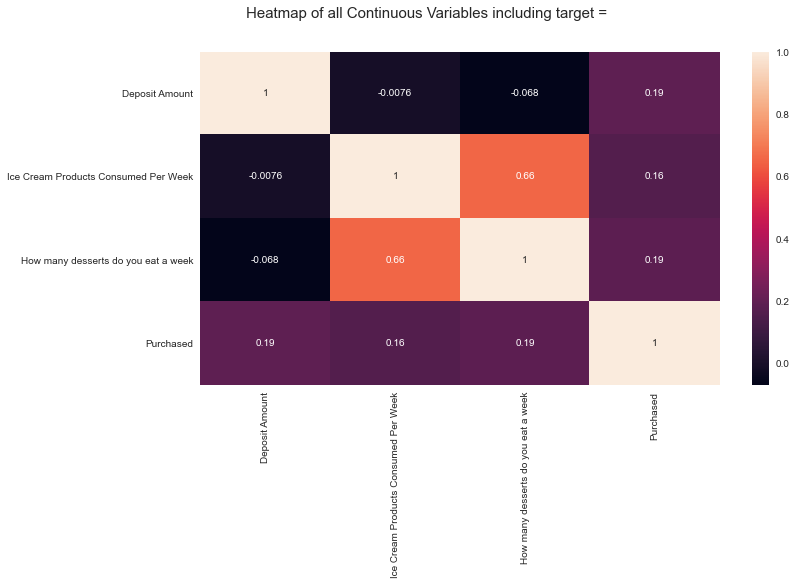

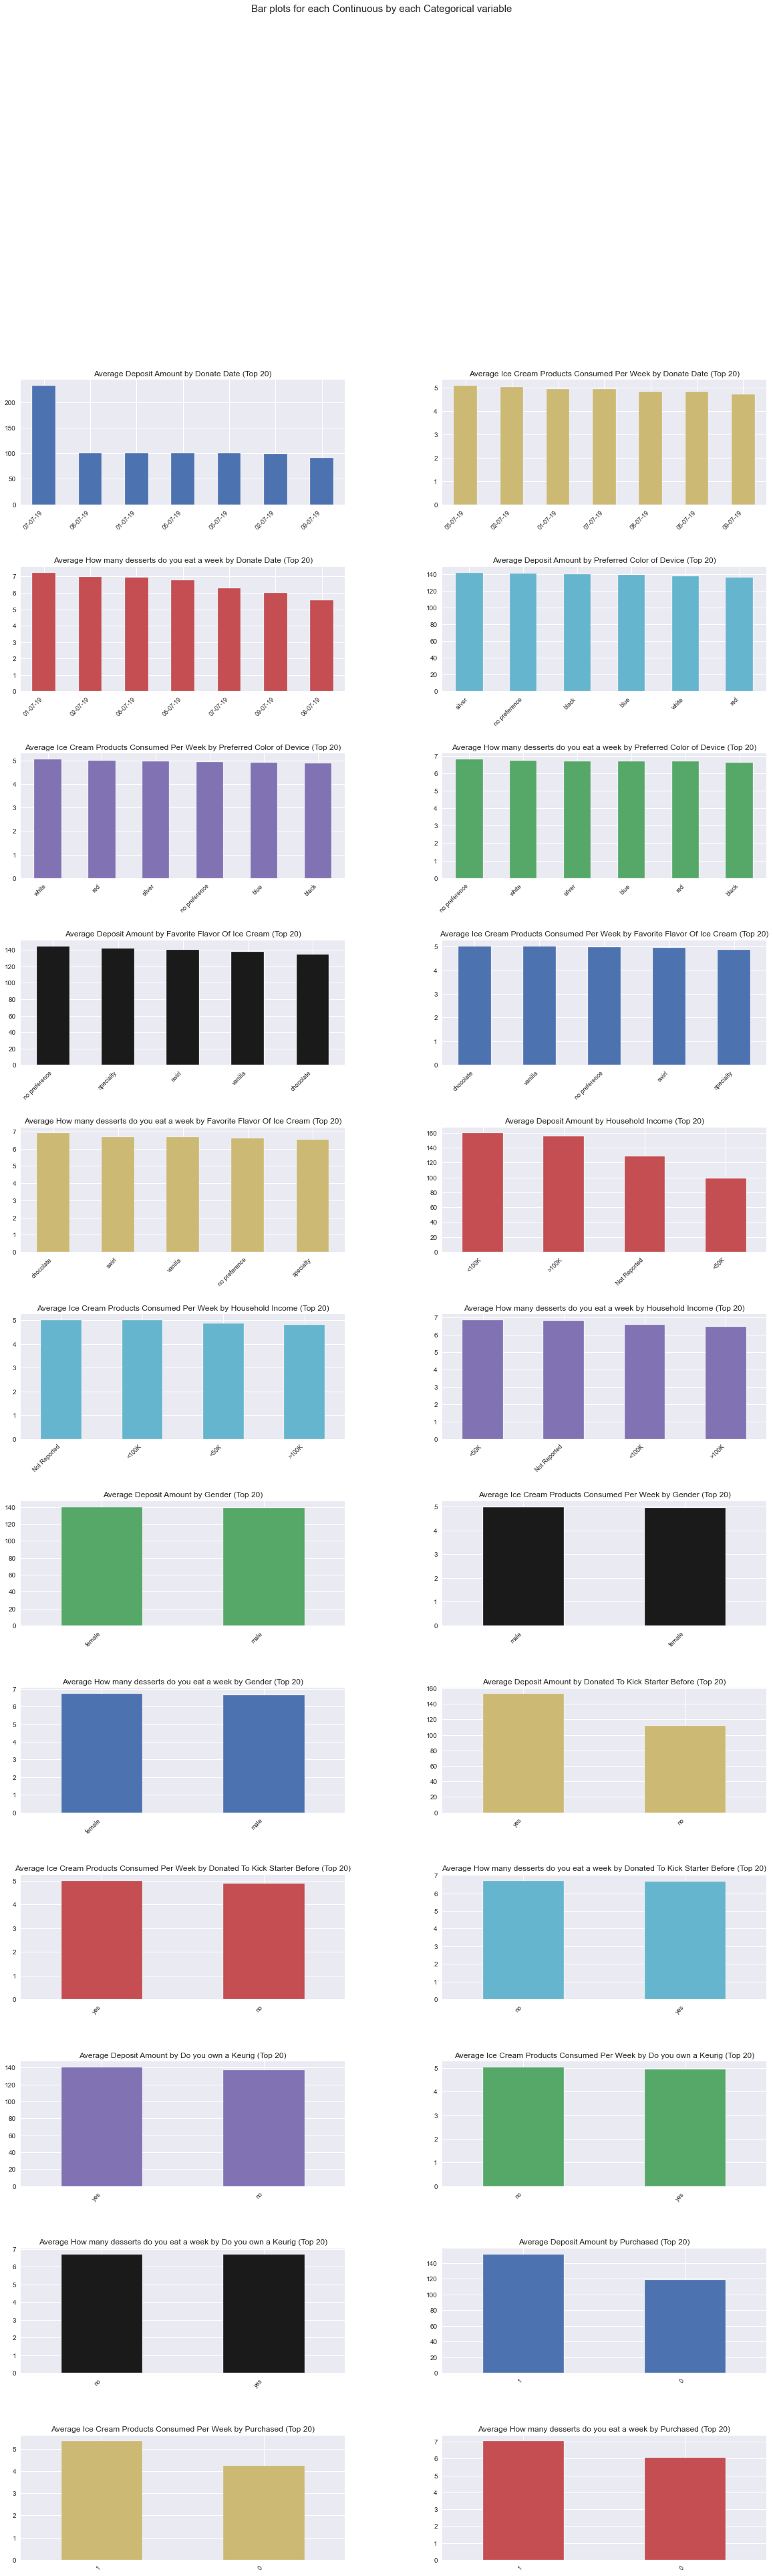

Time to run AutoViz (in seconds) = 8.996

 ###################### VISUALIZATION Completed ########################


In [40]:
filename = "KickstarterData_Facts-1.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=15000,
    max_cols_analyzed=15,
)

In [41]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

<AxesSubplot:xlabel='How many desserts do you eat a week'>

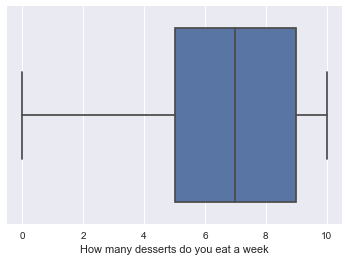

In [42]:
# Box Plot
sns.boxplot(x=df['How many desserts do you eat a week'])

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                   1.0
Deposit Amount                          19.0
Preferred Color of Device                3.0
Ice Cream Products Consumed Per Week     6.0
Favorite Flavor Of Ice Cream             3.0
Donated To Kick Starter Before           1.0
Household Income                         2.0
Do you own a Keurig                      0.0
How many desserts do you eat a week      4.0
Purchased                                1.0
dtype: float64


In [44]:
# Dropping Donate Date Column
df.drop('Donate Date', axis = 1, inplace = True)

In [45]:
# Splitting X and Y
# Dataset X with independent variables
X = df.drop('Purchased',axis = 1).copy()
X.head()

,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week
0,1,100,0,4,0,1,0,1,7
1,1,100,4,5,0,1,0,1,5
2,1,100,2,6,0,1,0,1,6
3,1,100,2,5,0,1,0,1,5
4,0,100,0,1,0,1,0,1,7


In [46]:
# Dataset Y with dependent variables
y = df['Purchased'].copy()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Purchased, dtype: int64

In [47]:
# one-hot encoding Technique
X_encoded = pd.get_dummies(X, columns=['Preferred Color of Device','Favorite Flavor Of Ice Cream'])
X_encoded.head()

,Gender,Deposit Amount,Ice Cream Products Consumed Per Week,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Preferred Color of Device_0,Preferred Color of Device_2,Preferred Color of Device_3,Preferred Color of Device_4,Preferred Color of Device_5,Preferred Color of Device_6,Favorite Flavor Of Ice Cream_0,Favorite Flavor Of Ice Cream_1,Favorite Flavor Of Ice Cream_3,Favorite Flavor Of Ice Cream_4,Favorite Flavor Of Ice Cream_6
0,1,100,4,1,0,1,7,1,0,0,0,0,0,1,0,0,0,0
1,1,100,5,1,0,1,5,0,0,0,1,0,0,1,0,0,0,0
2,1,100,6,1,0,1,6,0,1,0,0,0,0,1,0,0,0,0
3,1,100,5,1,0,1,5,0,1,0,0,0,0,1,0,0,0,0
4,0,100,1,1,0,1,7,1,0,0,0,0,0,1,0,0,0,0


In [48]:
# Logit Model
logit_model = sm.Logit(y,X_encoded)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.396030
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.3876
Time:                        18:07:54   Log-Likelihood:                -3960.3
converged:                       True   LL-Null:                       -6466.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Gender                                   3.7204      0.1

<AxesSubplot:>

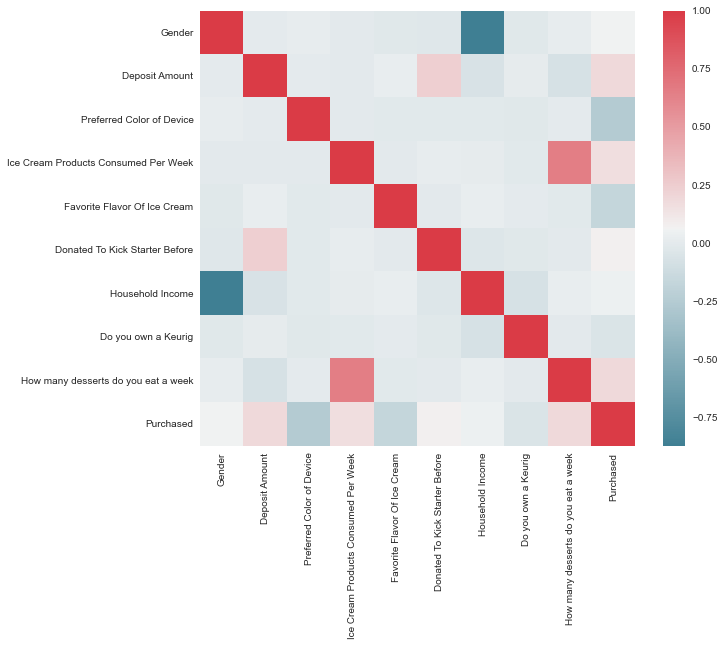

In [49]:
# Heat Map
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [50]:
# Logistic Regression
logistic_regression = LogisticRegression(solver='liblinear')
model = logistic_regression.fit(X_encoded,y)
cfm = confusion_matrix(y, logistic_regression.predict(X_encoded))
cfm

array([[2331, 1156],
       [ 574, 5939]], dtype=int64)

In [51]:
# Accuracy
accuracy = model.score(X_encoded, y)

In [52]:
# Precision 
precision = cfm[1][1]/ (cfm[0][1] + cfm[1][1])

In [53]:
# Recall
recall = cfm[1][1]/ (cfm[1][0] + cfm[1][1])

In [54]:
# F1-Score
f_score = (2 * precision * recall)/ (precision + recall)

In [55]:
print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1-Score: {}".format(f_score))

Accuracy: 0.827
Precision: 0.8370683579985906
Recall: 0.9118685705512053
F1-Score: 0.8728689006466785


In [56]:
df.head()

,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,100,0,4,0,1,0,1,7,0
1,1,100,4,5,0,1,0,1,5,1
2,1,100,2,6,0,1,0,1,6,1
3,1,100,2,5,0,1,0,1,5,1
4,0,100,0,1,0,1,0,1,7,0


In [57]:
# Decision Tree Model
X1 = df.drop('Purchased',axis=1)
y1 = df[['Purchased']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3,random_state=45)

In [58]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=45,max_depth=15, min_samples_leaf=10)   
clf_model.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, random_state=45)

In [59]:
y1_predict = clf_model.predict(X1_test)

In [60]:
# Accuracy
accuracy_score(y1_test, y1_predict)

0.886

In [61]:
target = list(df['Purchased'].unique())
feature_names = list(X1.columns)

In [62]:
# Confusion Matrix
cm_dt = confusion_matrix(y1_test, y1_predict)
print('Confusion matrix\n\n', cm_dt)

Confusion matrix

 [[ 926  138]
 [ 204 1732]]


In [63]:
print(classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1064
           1       0.93      0.89      0.91      1936

    accuracy                           0.89      3000
   macro avg       0.87      0.88      0.88      3000
weighted avg       0.89      0.89      0.89      3000



In [64]:
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Preferred Color of Device <= 5.50
|   |--- How many desserts do you eat a week <= 7.50
|   |   |--- Deposit Amount <= 200.50
|   |   |   |--- Favorite Flavor Of Ice Cream <= 5.00
|   |   |   |   |--- Household Income <= 0.50
|   |   |   |   |   |--- Ice Cream Products Consumed Per Week <= 3.50
|   |   |   |   |   |   |--- Ice Cream Products Consumed Per Week <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Ice Cream Products Consumed Per Week >  1.50
|   |   |   |   |   |   |   |--- Favorite Flavor Of Ice Cream <= 2.00
|   |   |   |   |   |   |   |   |--- Favorite Flavor Of Ice Cream <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Favorite Flavor Of Ice Cream >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Favorite Flavor Of Ice Cream >  2.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Ice Cream Products Consumed Per Week >  3.50
|   | 

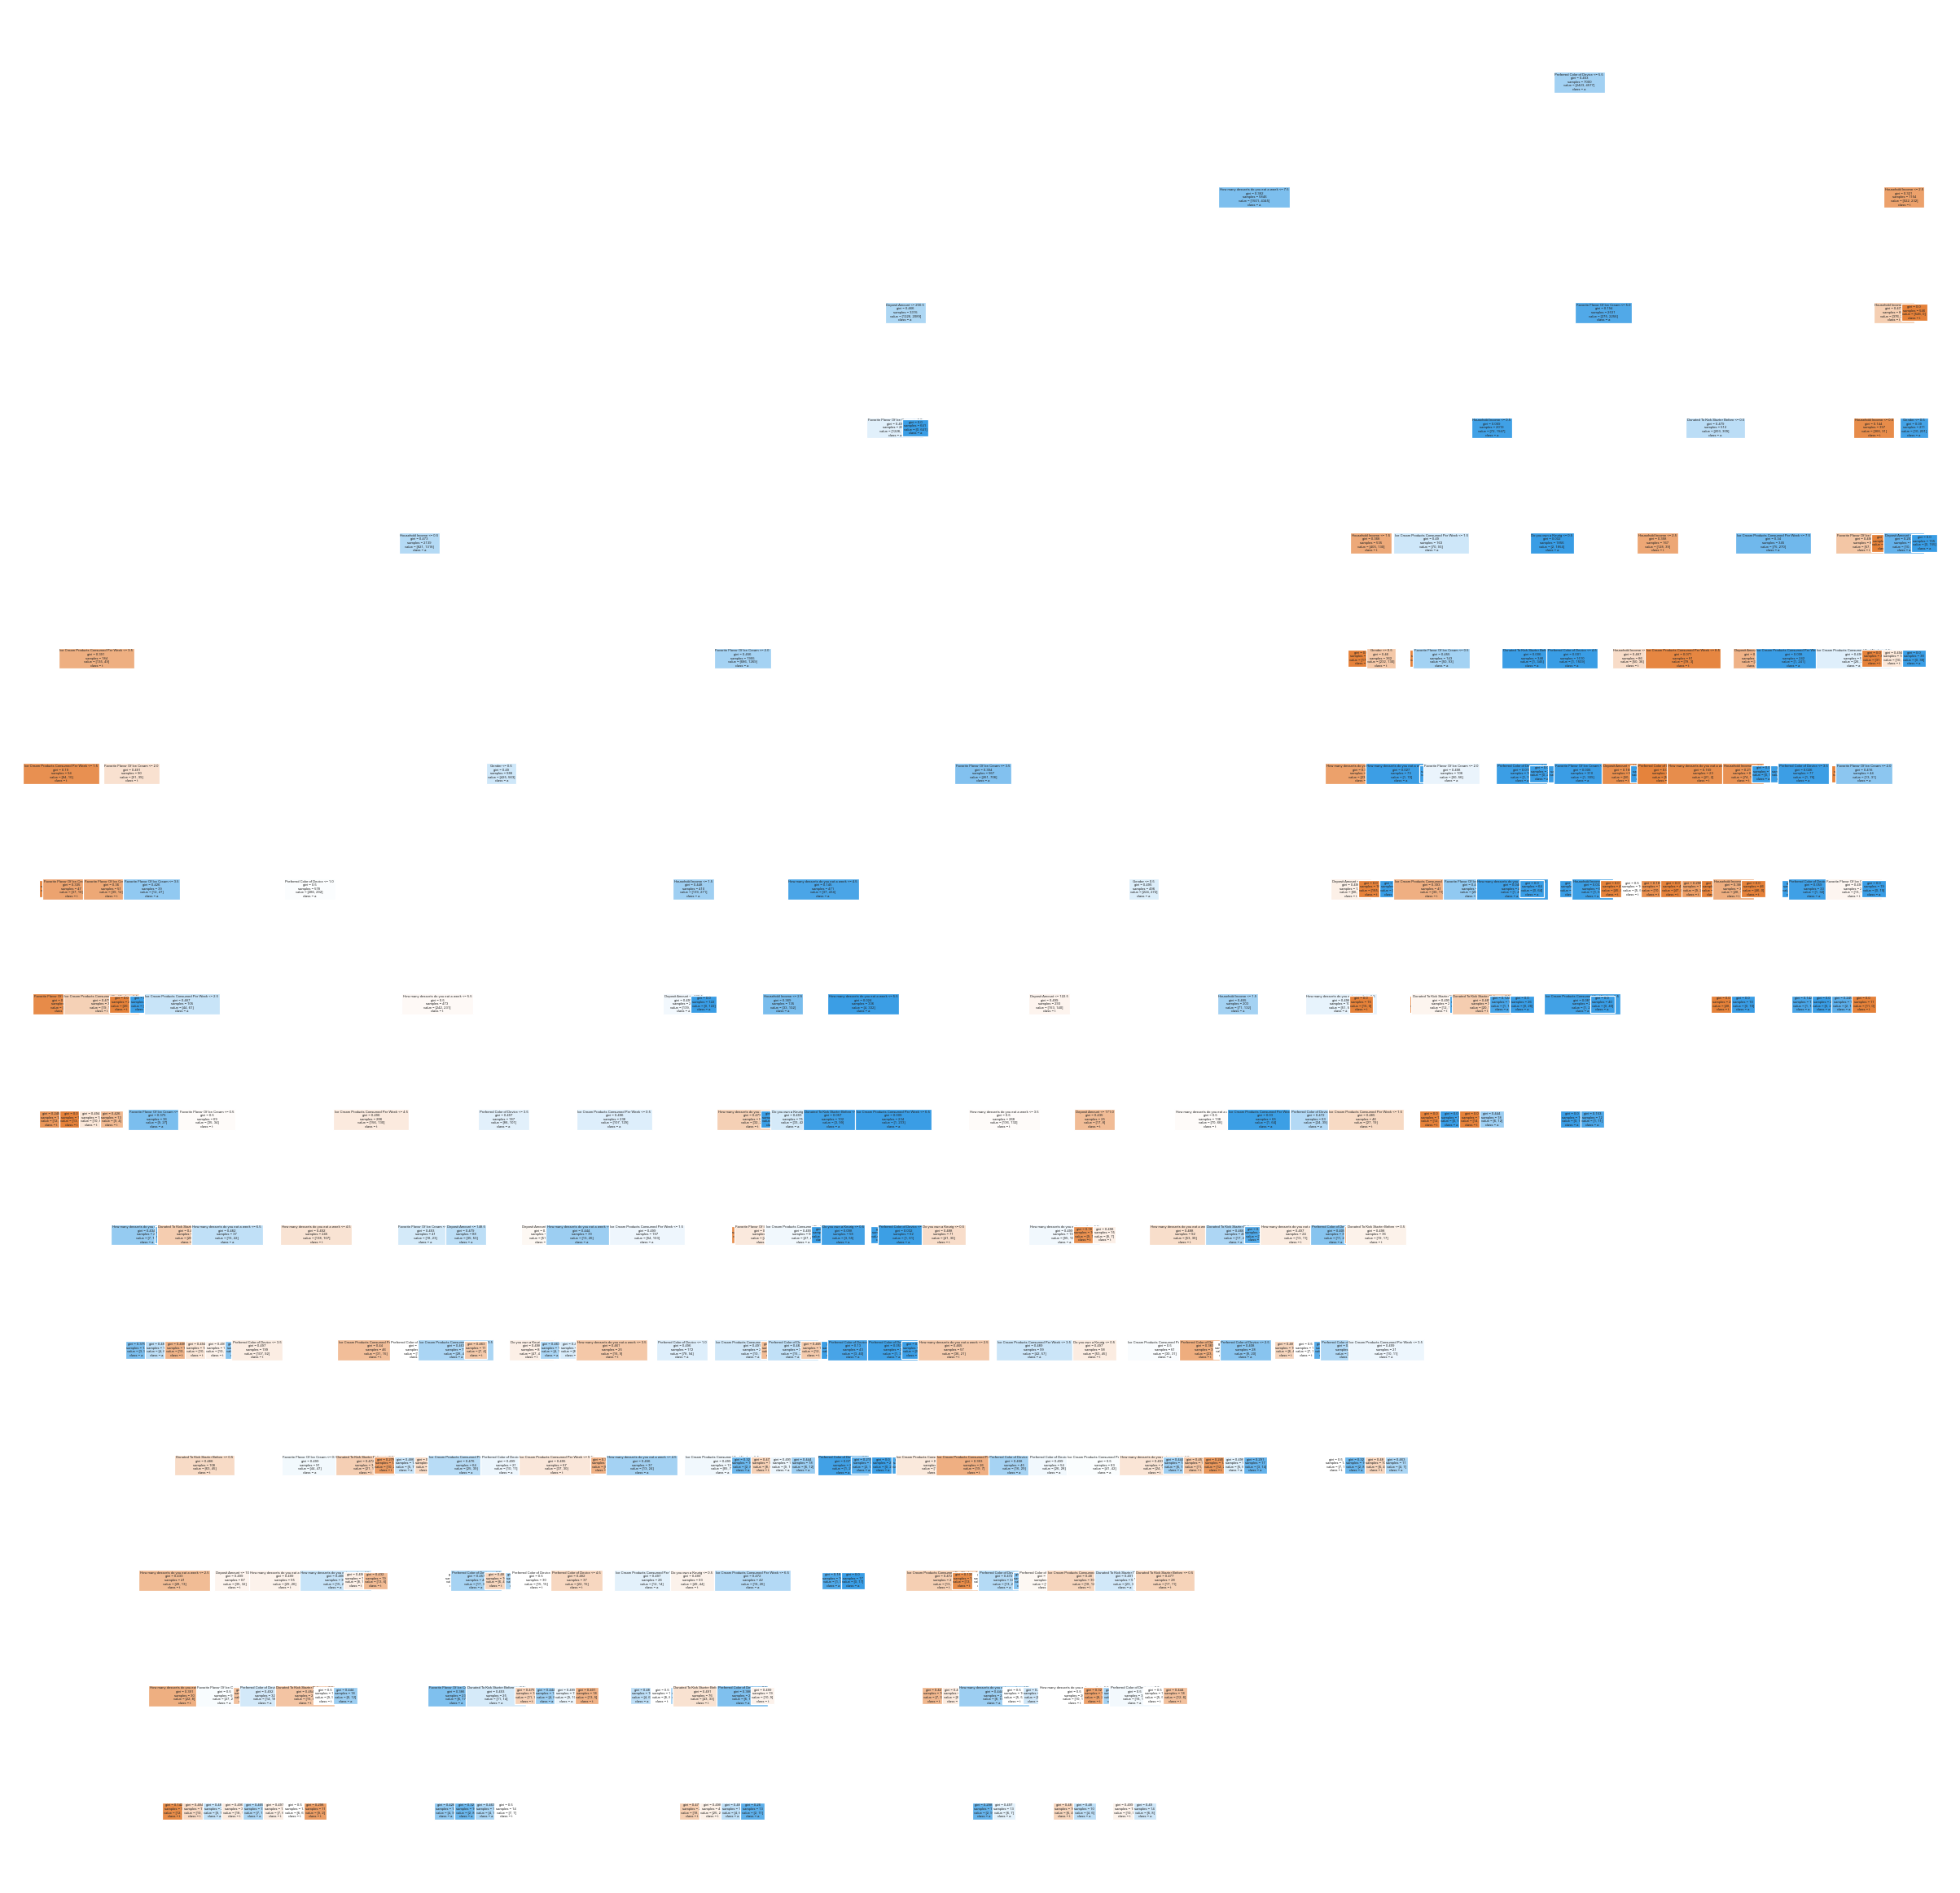

In [65]:
fn=feature_names
cn=list("target")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('DT.png')

In [66]:
features = df.columns
features

Index(['Gender', 'Deposit Amount', 'Preferred Color of Device',
       'Ice Cream Products Consumed Per Week', 'Favorite Flavor Of Ice Cream',
       'Donated To Kick Starter Before', 'Household Income',
       'Do you own a Keurig', 'How many desserts do you eat a week',
       'Purchased'],
      dtype='object')

In [67]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state = None, criterion = 'gini', max_features = 'auto', )
# Fit on training data
model.fit(X1_train,y1_train)

RandomForestClassifier()

In [68]:
rf_predictions = model.predict(X1_test)
# Probabilities for each class
rf_probs = model.predict_proba(X1_test)[:, 1]

In [69]:
# Accuracy
print("Accuracy:", accuracy_score(y1_test, rf_predictions))

Accuracy: 0.8856666666666667


In [70]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
2,Preferred Color of Device,0.264438
6,Household Income,0.162785
4,Favorite Flavor Of Ice Cream,0.147600
8,How many desserts do you eat a week,0.119699
1,Deposit Amount,0.111913
3,Ice Cream Products Consumed Per Week,0.107542
5,Donated To Kick Starter Before,0.039706
0,Gender,0.026858
7,Do you own a Keurig,0.019460


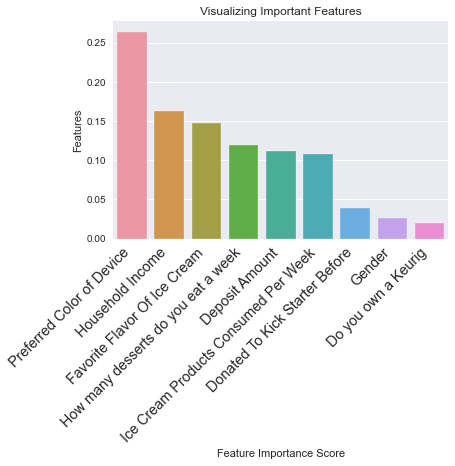

In [71]:
# Bar Plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [72]:
# ROC AUC Score
roc_value = roc_auc_score(y1_test, rf_probs)
print(roc_value)

0.9651442494407505


In [73]:
# Confusion matrix
cm = confusion_matrix(y1_test, rf_predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 899  165]
 [ 178 1758]]


In [74]:
print(classification_report(y1_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1064
           1       0.91      0.91      0.91      1936

    accuracy                           0.89      3000
   macro avg       0.87      0.88      0.88      3000
weighted avg       0.89      0.89      0.89      3000



### Thank You!